## Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import itertools
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations

In [11]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Load and Initial Data Exploration

# Load original dataset

In [12]:
df = pd.read_csv("dataset.csv")
print("Original Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.describe())

Original Shape: (302, 11)

First 5 rows:
   linkedin_id          job_title   contract     mode       city  country  \
0   3629542706       Data Analyst  Full-time  On-site  Oldenburg  Germany   
1   3580242005       Data Analyst  Full-time  On-site        NaN    Italy   
2   3570731003    Data Specialist  Full-time   Hybrid      Milan    Italy   
3   3587767744       Data Analyst  Full-time   Hybrid     Prague  Czechia   
4   3625424422  Financial Analyst  Full-time  On-site     Madrid    Spain   

                                  company                             sector  \
0  hanfried Personaldienstleistungen GmbH              Staffing & Recruiting   
1                             Telebit SpA                 Telecommunications   
2                         NTT DATA Italia  Information Technology & Services   
3                                     Aon                 Financial Services   
4                         BNP Paribas CIB                 Financial Services   

               

## Data Cleaning

In [13]:
print("\n=== DATA CLEANING ===")
print("Null values before cleaning:")
print(df.isnull().sum())


=== DATA CLEANING ===
Null values before cleaning:
linkedin_id           0
job_title             0
contract              0
mode                 15
city                 22
country               0
company               0
sector                0
job_posting_title     0
description           0
linkedin_skills       0
dtype: int64


# Clean data

In [14]:
df_cleaned = df.dropna(subset=['mode', 'city'])
print("\nNull values after cleaning critical columns:")
print(df_cleaned[['mode', 'city']].isnull().sum())


Null values after cleaning critical columns:
mode    0
city    0
dtype: int64


# Save cleaned dataset

In [15]:
df_cleaned.to_csv('Job_data.csv', index=False)
print("Cleaned dataset saved as 'Job_data.csv'")

Cleaned dataset saved as 'Job_data.csv'


# Reload cleaned dataset

In [16]:
df = pd.read_csv('Job_data.csv')
print(f"\nFinal dataset shape: {df.shape}")
print("Final null value check:")
print(df.isnull().sum())


Final dataset shape: (265, 11)
Final null value check:
linkedin_id          0
job_title            0
contract             0
mode                 0
city                 0
country              0
company              0
sector               0
job_posting_title    0
description          0
linkedin_skills      0
dtype: int64


## BASIC ANALYSIS SECTION

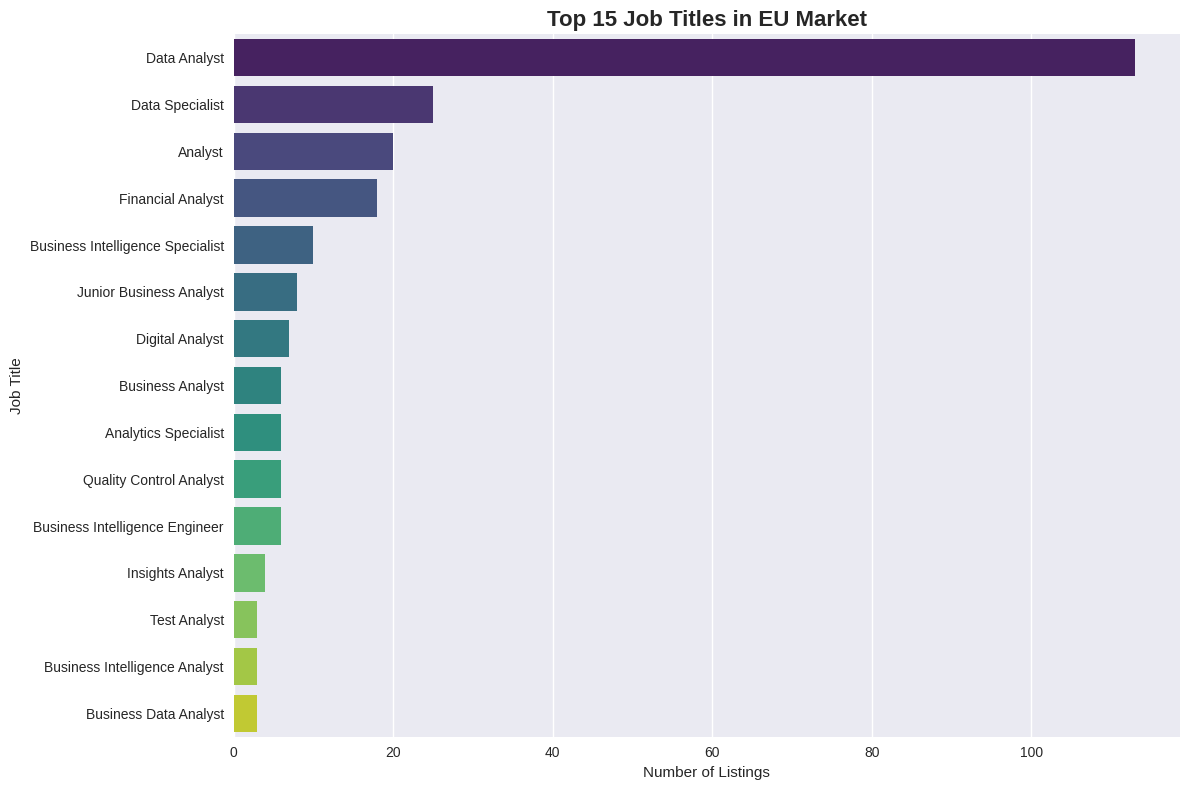

In [17]:
plt.figure(figsize=(12,8))
top_titles = df['job_title'].value_counts().head(15)
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")
plt.title("Top 15 Job Titles in EU Market", fontsize=16, fontweight='bold')
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# 2. Jobs by Country

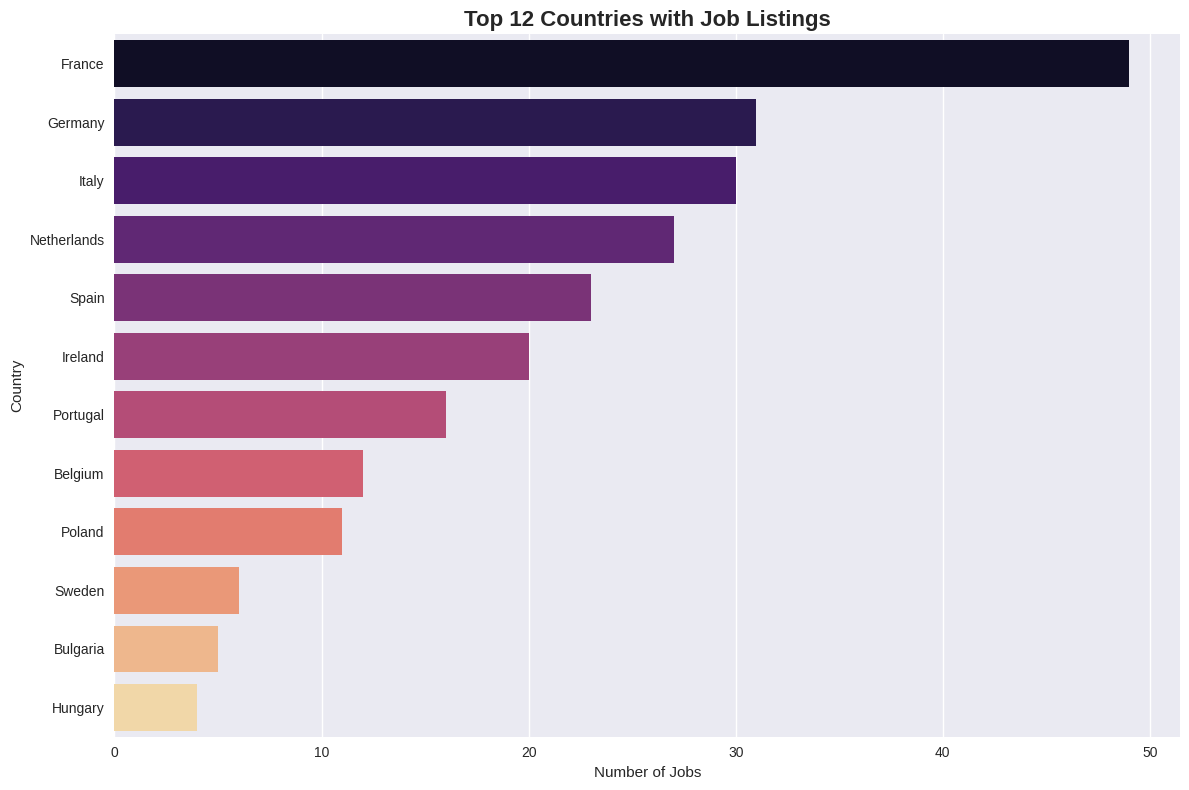

In [18]:
plt.figure(figsize=(12,8))
country_counts = df['country'].value_counts().head(12)
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.title("Top 12 Countries with Job Listings", fontsize=16, fontweight='bold')
plt.xlabel("Number of Jobs")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 3. Jobs by City

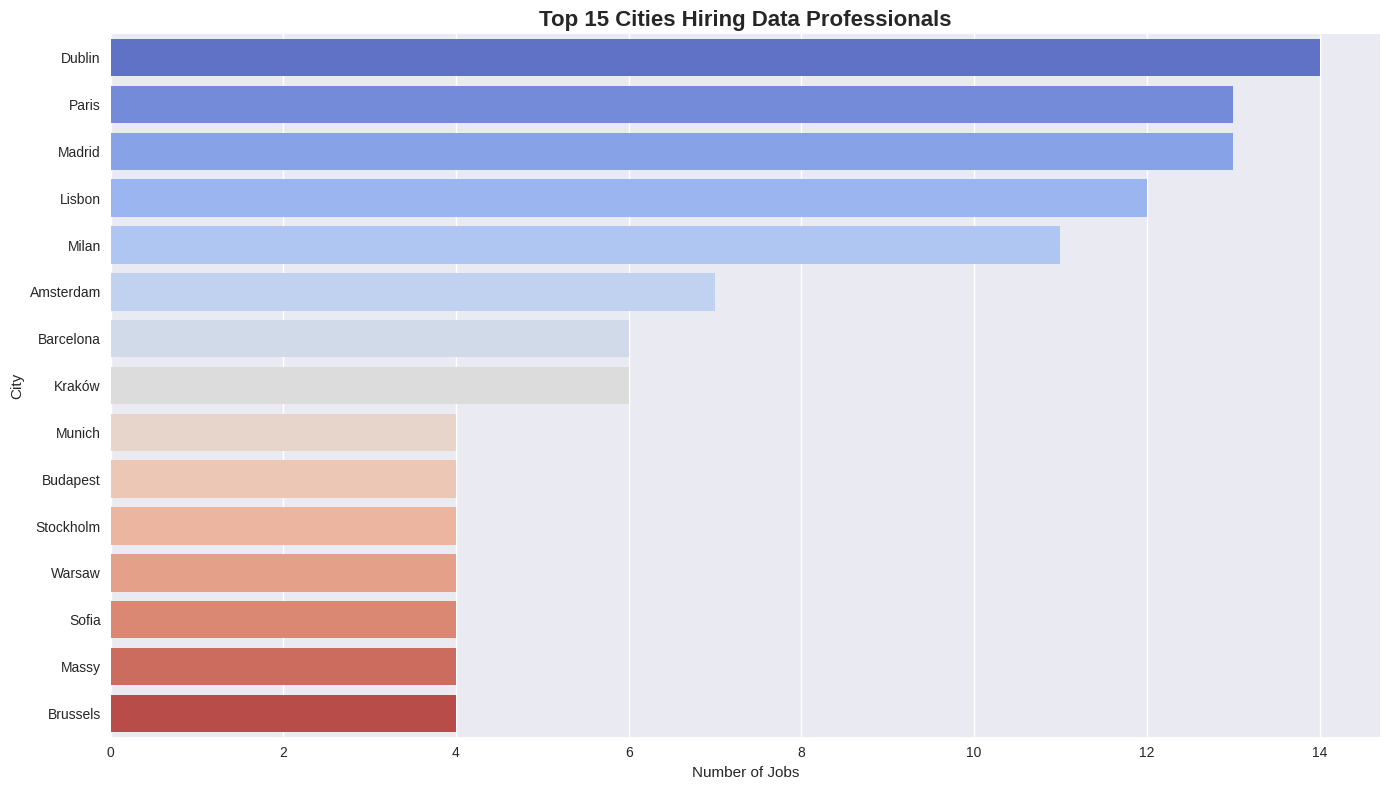

In [19]:
plt.figure(figsize=(14,8))
city_counts = df['city'].value_counts().head(15)
sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")
plt.title("Top 15 Cities Hiring Data Professionals", fontsize=16, fontweight='bold')
plt.xlabel("Number of Jobs")
plt.ylabel("City")
plt.tight_layout()
plt.show()

## 4. Work Mode Distribution

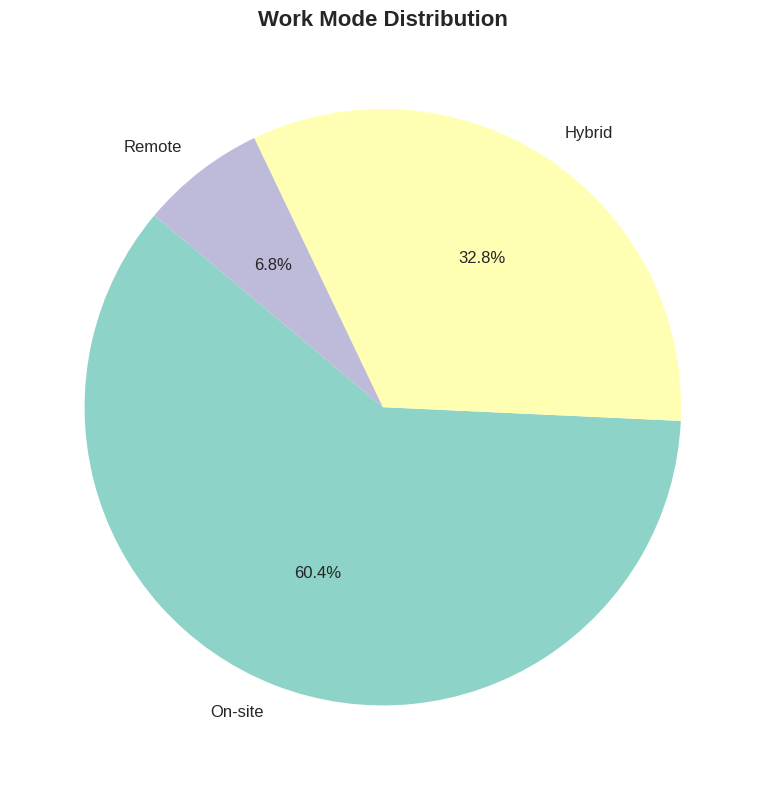

In [20]:
mode_counts = df['mode'].value_counts()
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set3", len(mode_counts))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Work Mode Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Contract Types

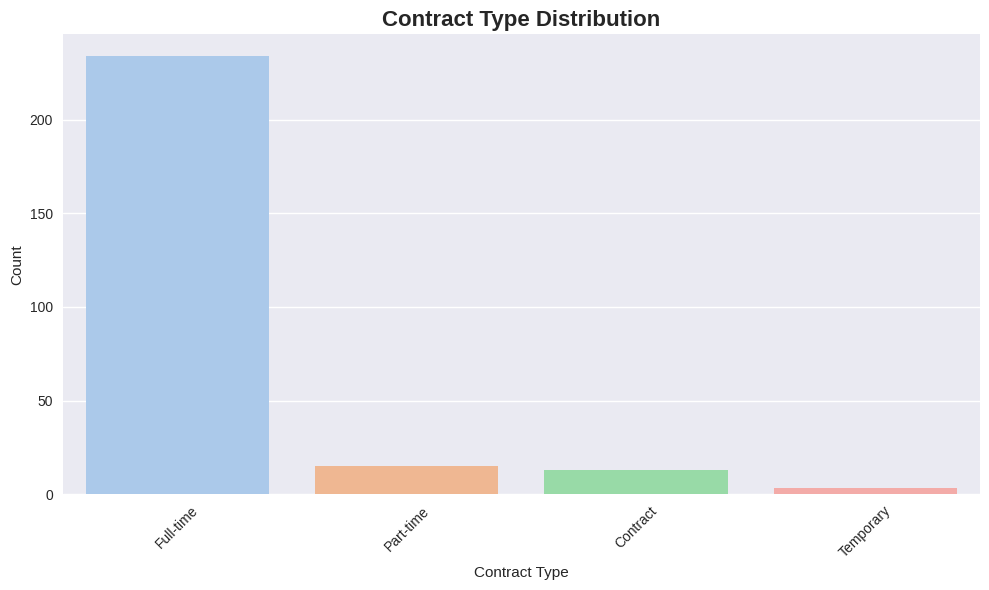

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="contract", order=df['contract'].value_counts().index,
             palette="pastel")
plt.title("Contract Type Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Jobs by Sector

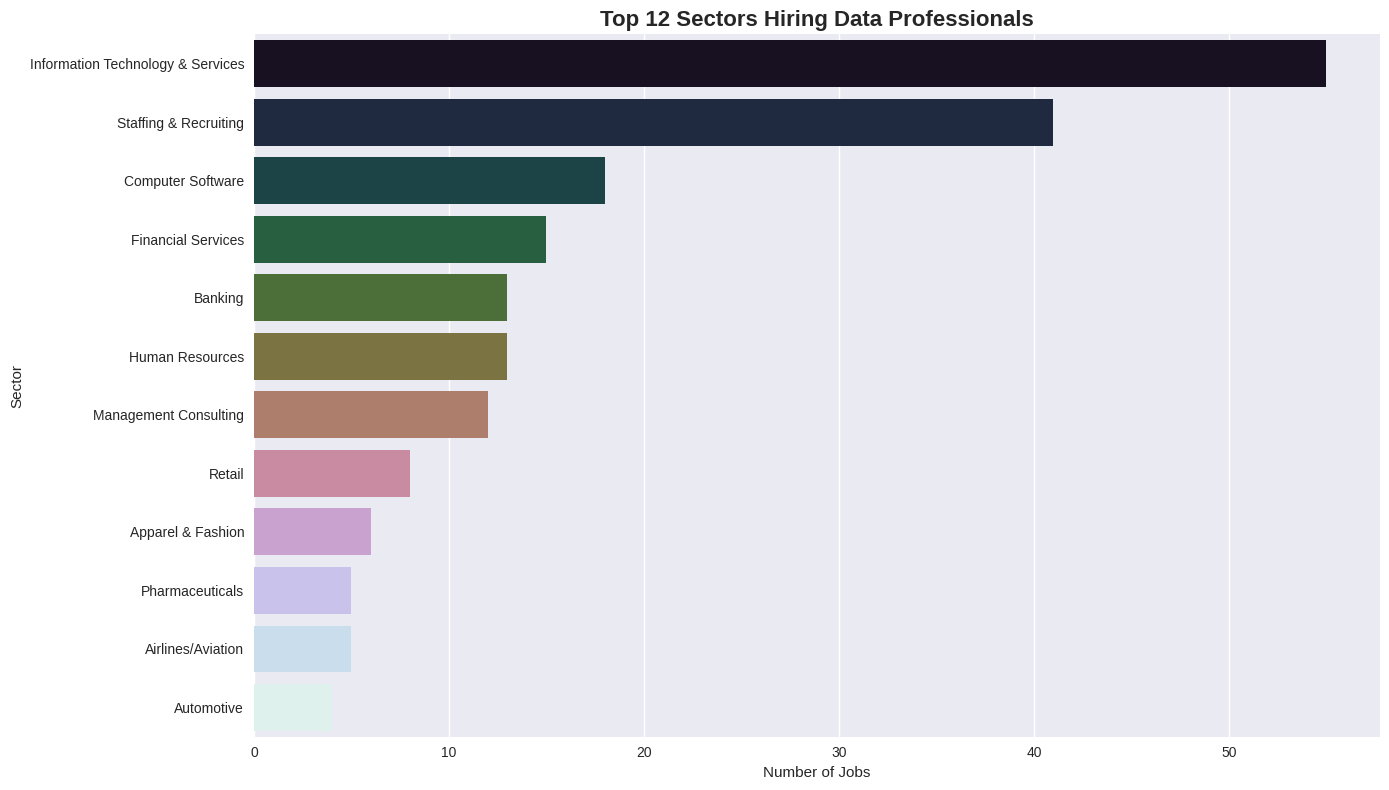

In [22]:
plt.figure(figsize=(14,8))
sector_counts = df['sector'].value_counts().head(12)
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="cubehelix")
plt.title("Top 12 Sectors Hiring Data Professionals", fontsize=16, fontweight='bold')
plt.xlabel("Number of Jobs")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

## 7. Most Demanded Skills

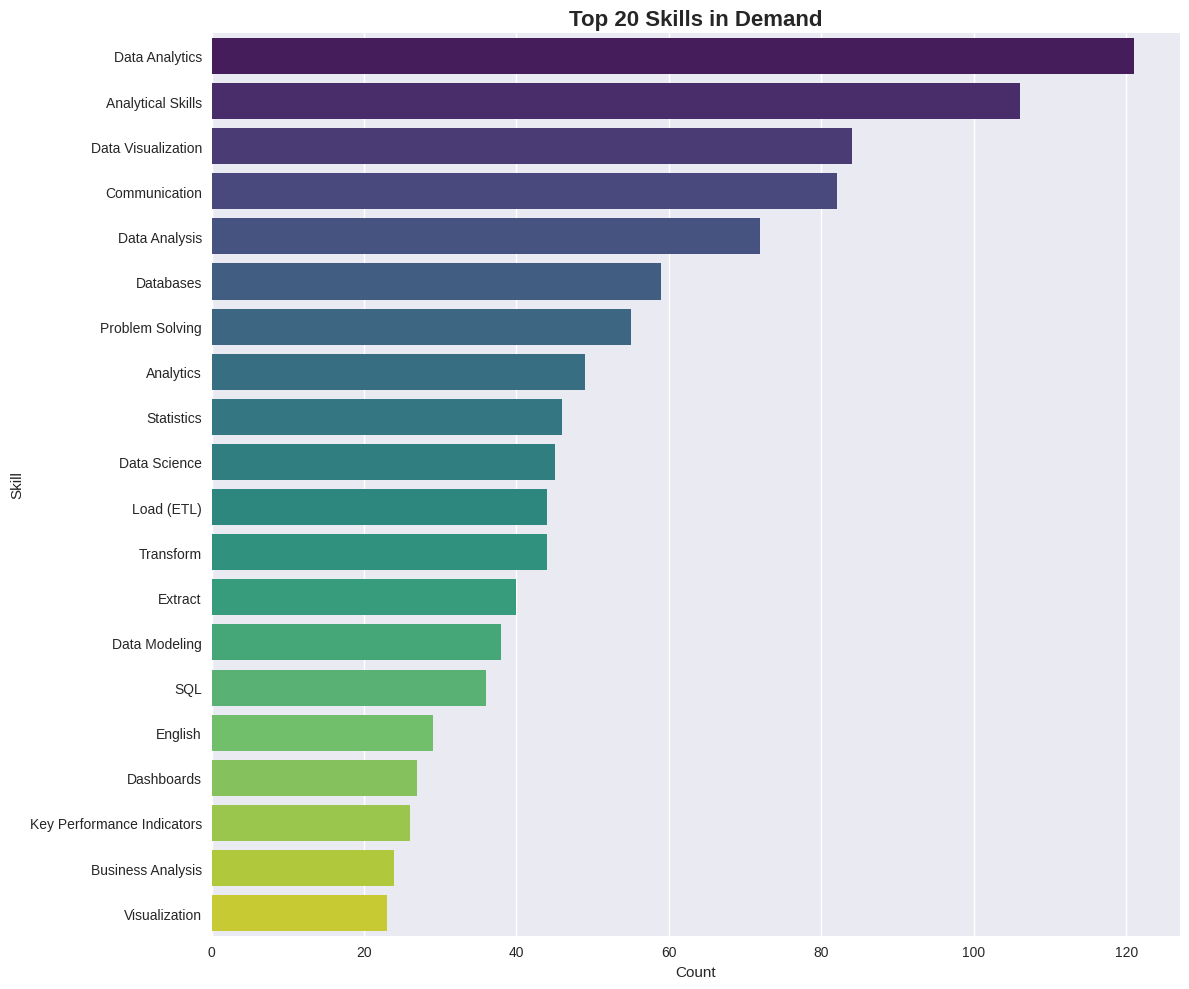

In [23]:
all_skills = [skill.strip() for skills in df['linkedin_skills'].dropna()
              for skill in skills.split(",")]
skill_counts = pd.Series(all_skills).value_counts().head(20)

plt.figure(figsize=(12,10))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")
plt.title("Top 20 Skills in Demand", fontsize=16, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

## 8. Skills Word Cloud

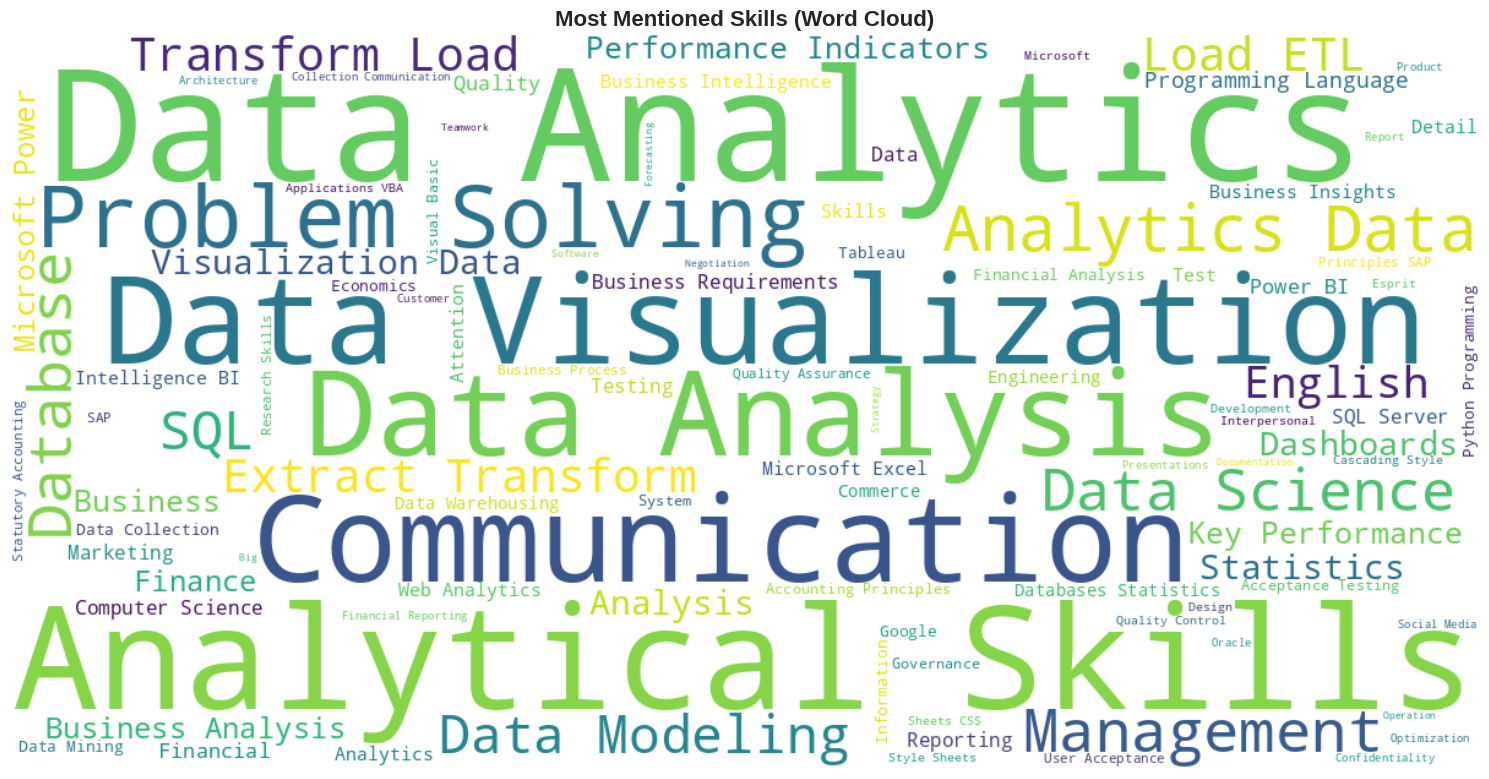

In [24]:
text = " ".join(df['linkedin_skills'].dropna())
wc = WordCloud(width=1200, height=600, background_color="white",
               colormap="viridis", max_words=100).generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Skills (Word Cloud)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Contract Type Trends Across Countries

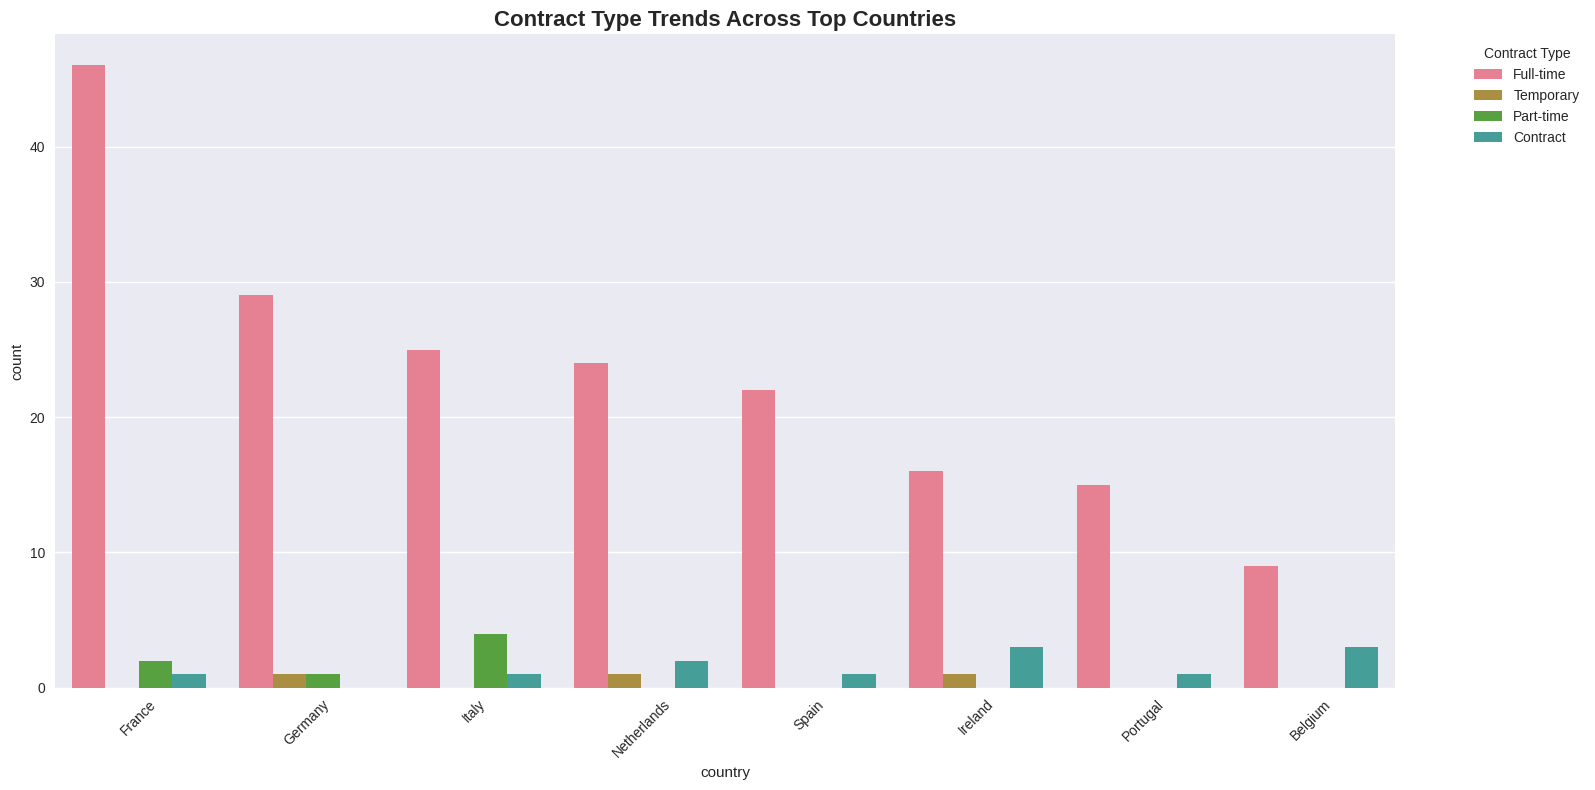

In [25]:
plt.figure(figsize=(16,8))
top_countries = df['country'].value_counts().head(8).index
df_top_countries = df[df['country'].isin(top_countries)]
sns.countplot(data=df_top_countries, x="country", hue="contract",
             order=df_top_countries['country'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Contract Type Trends Across Top Countries", fontsize=16, fontweight='bold')
plt.legend(title="Contract Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 10. Work Mode Trends Across Countries

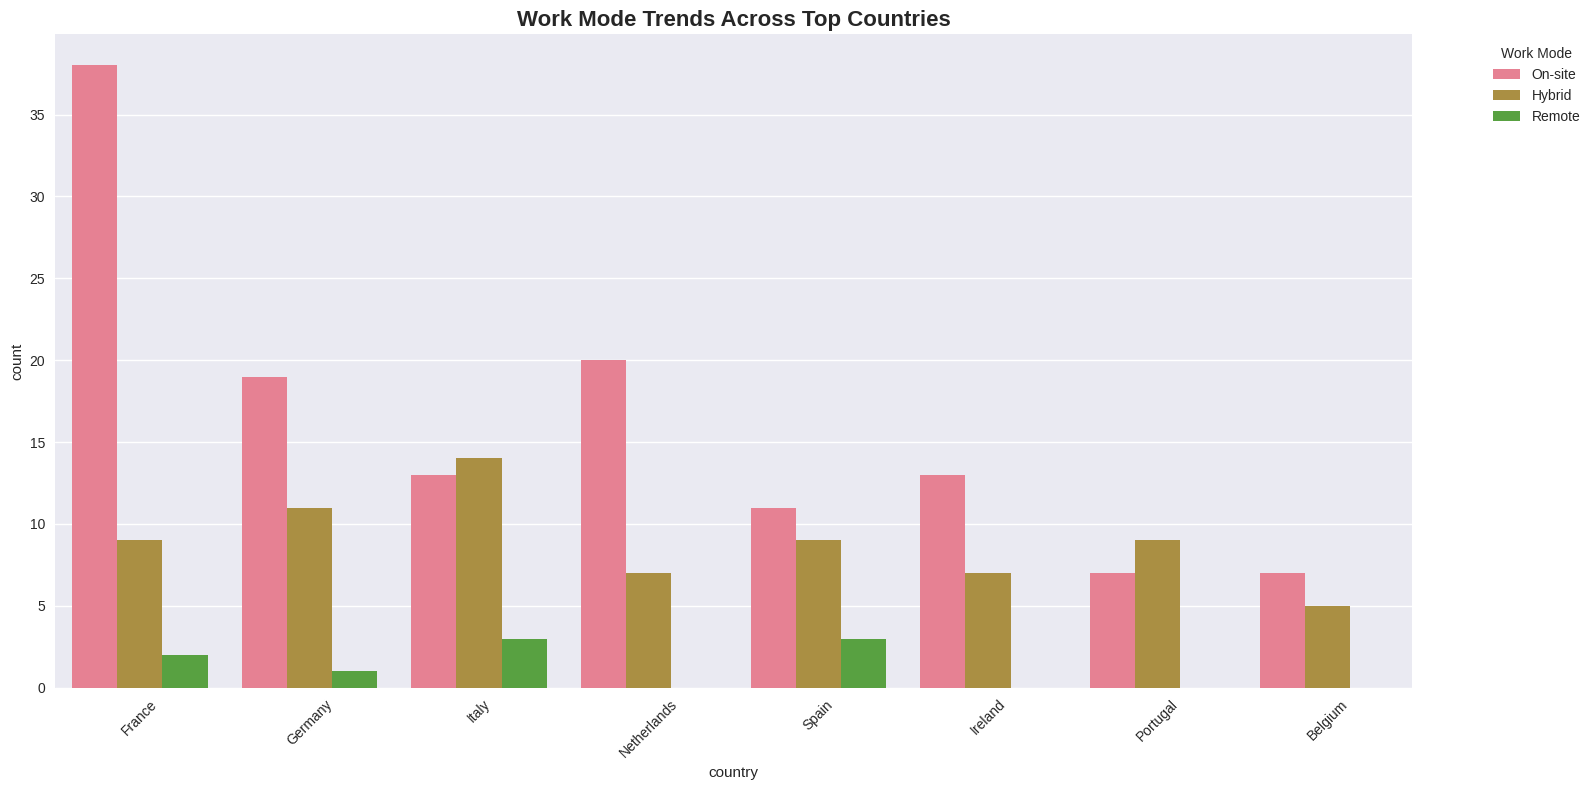

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_top_countries, x="country", hue="mode",
             order=df_top_countries['country'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Work Mode Trends Across Top Countries", fontsize=16, fontweight='bold')
plt.legend(title="Work Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 11. Top Companies Hiring

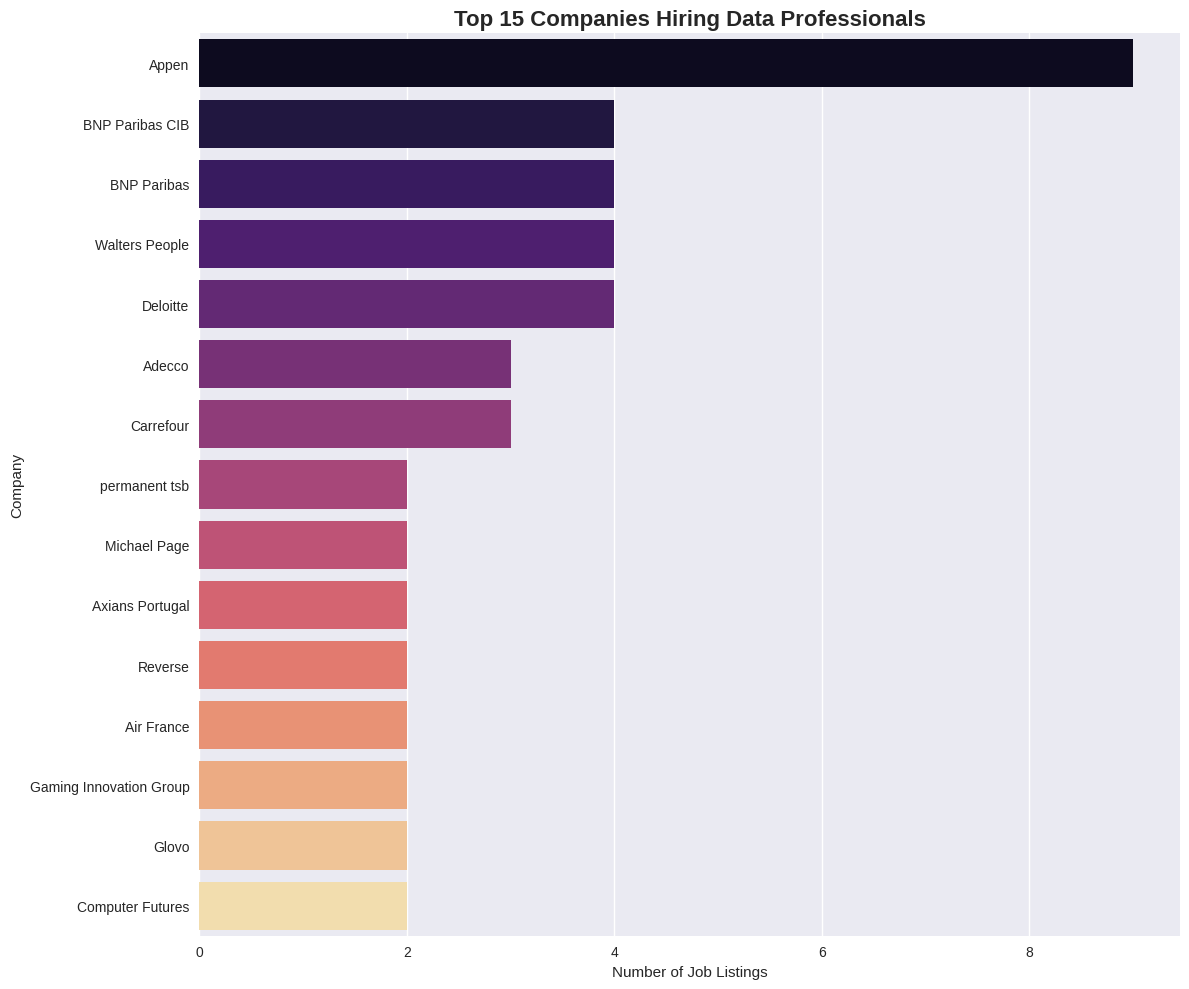

In [27]:
top_companies = df['company'].value_counts().head(15)
plt.figure(figsize=(12,10))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="magma")
plt.title("Top 15 Companies Hiring Data Professionals", fontsize=16, fontweight='bold')
plt.xlabel("Number of Job Listings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

## Statistical Analysis Functions


In [28]:
def analyze_correlations(df):
    """Analyze correlations between categorical variables"""
    print("Analyzing correlations between job characteristics...")

    # Encode categorical variables
    le_country = LabelEncoder()
    le_mode = LabelEncoder()
    le_contract = LabelEncoder()

    df_encoded = df.copy()
    df_encoded['country_encoded'] = le_country.fit_transform(df['country'])
    df_encoded['mode_encoded'] = le_mode.fit_transform(df['mode'])
    df_encoded['contract_encoded'] = le_contract.fit_transform(df['contract'])

    # Correlation matrix
    corr_matrix = df_encoded[['country_encoded', 'mode_encoded', 'contract_encoded']].corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Correlation Between Job Characteristics', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return corr_matrix

def calculate_market_concentration(df, column):
    """Calculate Herfindahl-Hirschman Index for market concentration"""
    counts = df[column].value_counts()
    market_shares = counts / counts.sum()
    hhi = (market_shares ** 2).sum()

    interpretation = ('Highly Concentrated' if hhi > 0.25 else
                     'Moderately Concentrated' if hhi > 0.15 else 'Competitive')

    print(f"\nMarket Concentration for {column.upper()}:")
    print(f"HHI Score: {hhi:.4f}")
    print(f"Market Status: {interpretation}")

    return hhi

def analyze_skill_combinations(df, min_support=5):
    """Find frequently occurring skill combinations"""
    print("\nAnalyzing skill combinations...")

    skills_lists = df['linkedin_skills'].dropna().apply(lambda x: [s.strip() for s in x.split(',')])

    # Get all skill pairs
    skill_pairs = []
    for skills in skills_lists:
        if len(skills) >= 2:
            skill_pairs.extend(list(itertools.combinations(sorted(skills), 2)))

    # Count occurrences
    pair_counts = Counter(skill_pairs)
    frequent_pairs = {pair: count for pair, count in pair_counts.items() if count >= min_support}

    # Create visualization
    if frequent_pairs:
        pairs_df = pd.DataFrame(list(frequent_pairs.items()), columns=['Skill_Pair', 'Count'])
        pairs_df['Pair_Label'] = pairs_df['Skill_Pair'].apply(lambda x: f"{x[0]} + {x[1]}")

        plt.figure(figsize=(14,10))
        top_pairs = pairs_df.nlargest(15, 'Count')
        sns.barplot(data=top_pairs, x='Count', y='Pair_Label', palette='viridis')
        plt.title('Top 15 Skill Combinations', fontsize=16, fontweight='bold')
        plt.xlabel('Co-occurrence Count')
        plt.tight_layout()
        plt.show()

        print(f"Found {len(frequent_pairs)} skill combinations occurring {min_support}+ times")

    return frequent_pairs

def create_interactive_dashboard(df):
    """Create interactive Plotly visualizations"""
    print("\nCreating interactive visualizations...")

    # Interactive country distribution
    country_data = df['country'].value_counts().head(10).reset_index()
    country_data.columns = ['Country', 'Job_Count']

    fig1 = px.bar(country_data, x='Job_Count', y='Country', orientation='h',
                  title='Interactive Job Distribution by Country',
                  labels={'Job_Count': 'Number of Jobs', 'Country': 'Country'},
                  color='Job_Count', color_continuous_scale='Viridis')
    fig1.update_layout(height=600)
    fig1.show()

    # Interactive work mode by country
    mode_country = df.groupby(['country', 'mode']).size().reset_index(name='count')
    fig2 = px.bar(mode_country, x='country', y='count', color='mode',
                  title='Work Mode Distribution by Country',
                  labels={'count': 'Number of Jobs'})
    fig2.update_xaxes(tickangle=45)
    fig2.update_layout(height=600)
    fig2.show()

    # Interactive skills analysis
    skill_data = pd.Series(all_skills).value_counts().head(20).reset_index()
    skill_data.columns = ['Skill', 'Count']

    fig3 = px.bar(skill_data, x='Count', y='Skill', orientation='h',
                  title='Top 20 Skills in Demand (Interactive)',
                  labels={'Count': 'Frequency', 'Skill': 'Skill'},
                  color='Count', color_continuous_scale='Plasma')
    fig3.update_layout(height=800)
    fig3.show()

def analyze_company_patterns(df):
    """Deep dive into company hiring patterns"""
    print("\nAnalyzing company hiring patterns...")

    # Company size analysis
    company_sizes = df['company'].value_counts()

    def categorize_company_size(count):
        if count >= 50: return 'Large Enterprise (50+ jobs)'
        elif count >= 20: return 'Medium Company (20-49 jobs)'
        elif count >= 5: return 'Small Company (5-19 jobs)'
        else: return 'Startup/Small (1-4 jobs)'

    size_categories = company_sizes.apply(categorize_company_size)

    plt.figure(figsize=(10,8))
    size_dist = size_categories.value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(size_dist)))
    plt.pie(size_dist.values, labels=size_dist.index, autopct='%1.1f%%',
            colors=colors, textprops={'fontsize': 10})
    plt.title('Company Size Distribution in Job Market', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


Analyzing correlations between job characteristics...


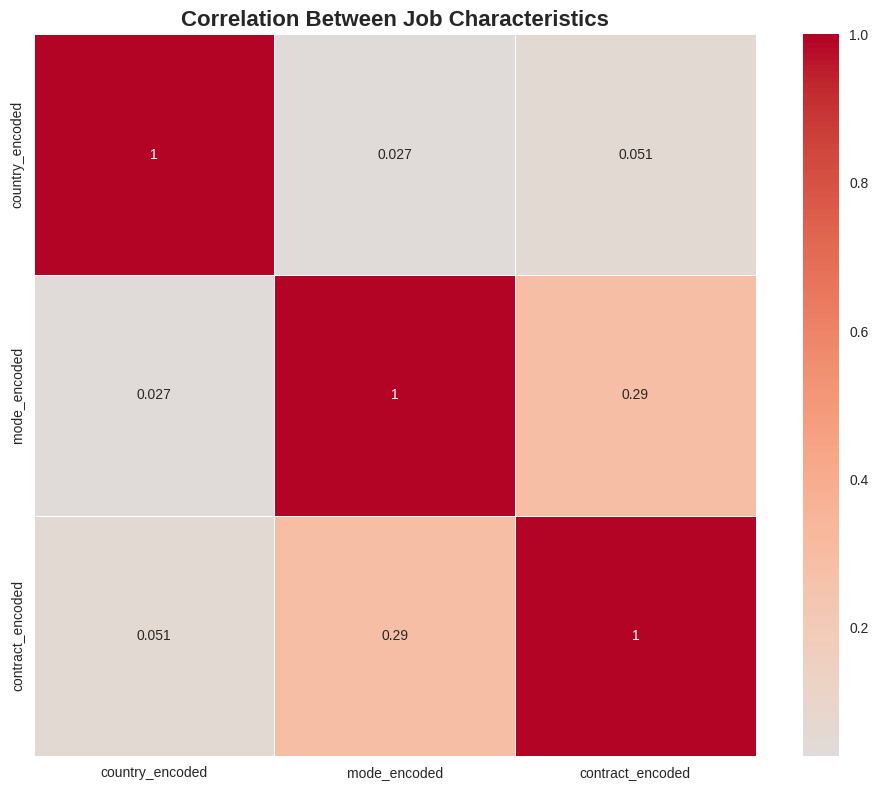


Market Concentration for COUNTRY:
HHI Score: 0.0941
Market Status: Competitive

Market Concentration for COMPANY:
HHI Score: 0.0061
Market Status: Competitive

Market Concentration for SECTOR:
HHI Score: 0.0862
Market Status: Competitive

Analyzing skill combinations...


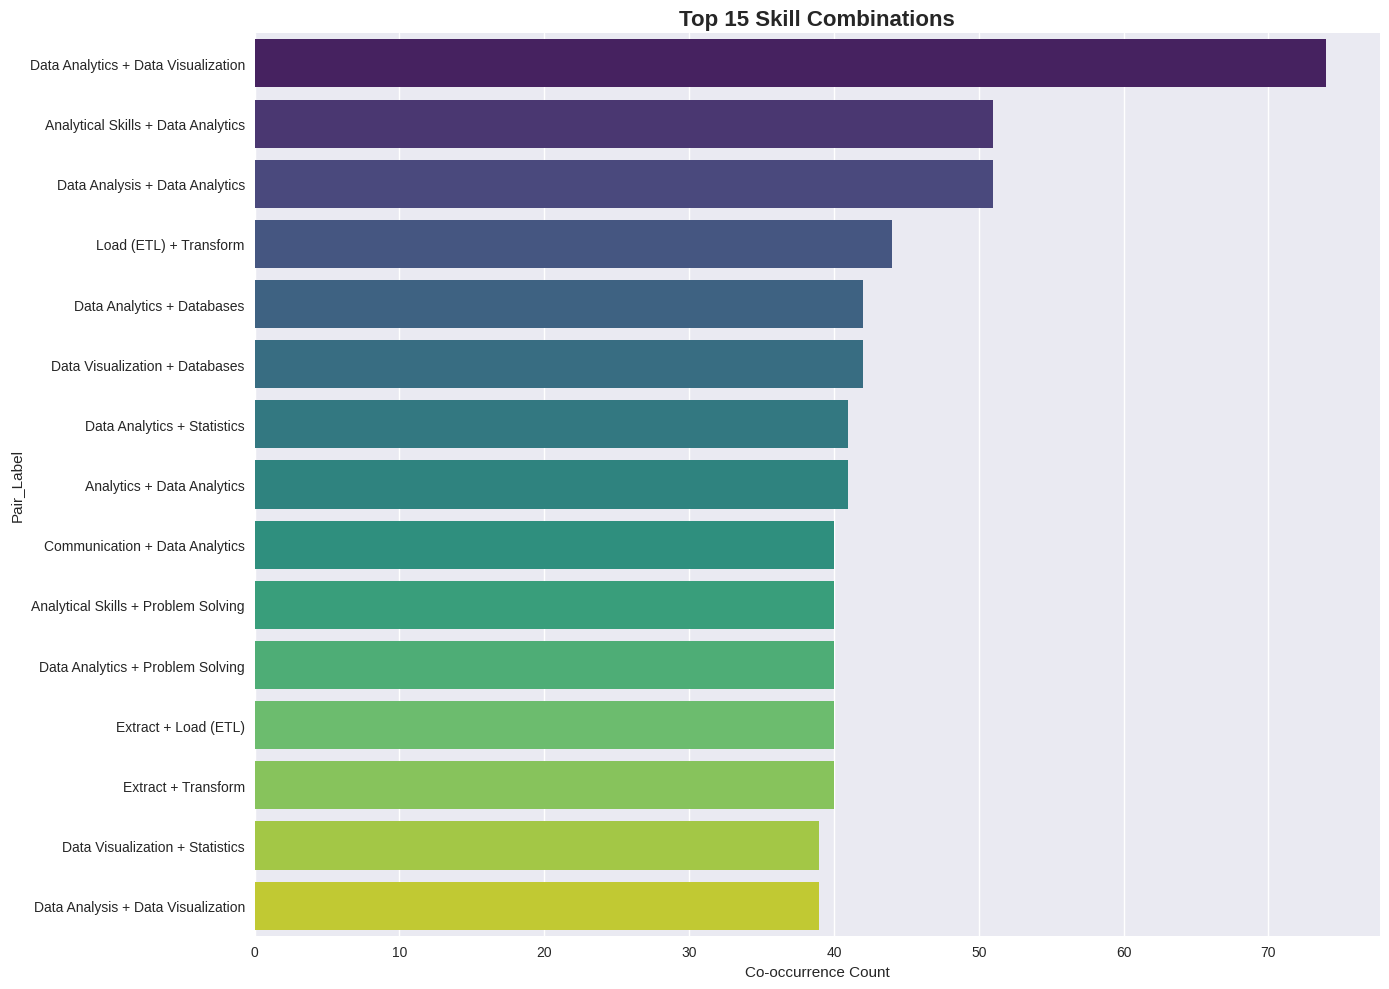

Found 295 skill combinations occurring 5+ times

Creating interactive visualizations...



Analyzing company hiring patterns...


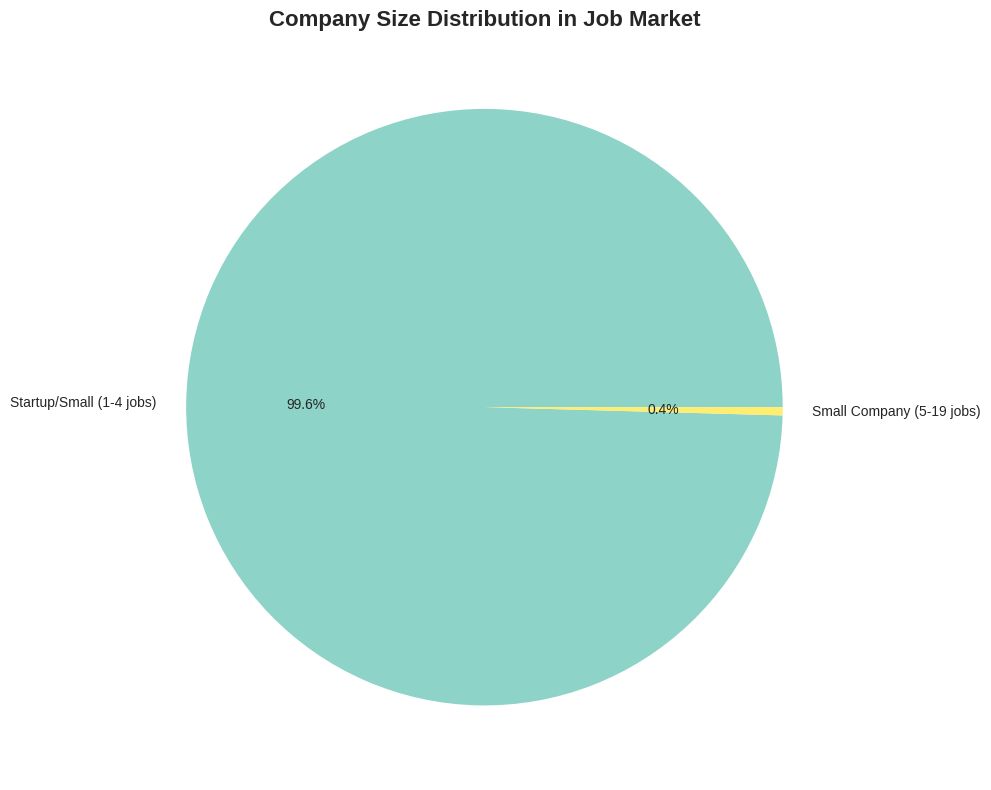

In [29]:
# Execute advanced analysis
corr_results = analyze_correlations(df)

# Market concentration analysis
for column in ['country', 'company', 'sector']:
    calculate_market_concentration(df, column)

# Skill combinations analysis
skill_combos = analyze_skill_combinations(df)

# Interactive visualizations
create_interactive_dashboard(df)

# Company patterns analysis
analyze_company_patterns(df)

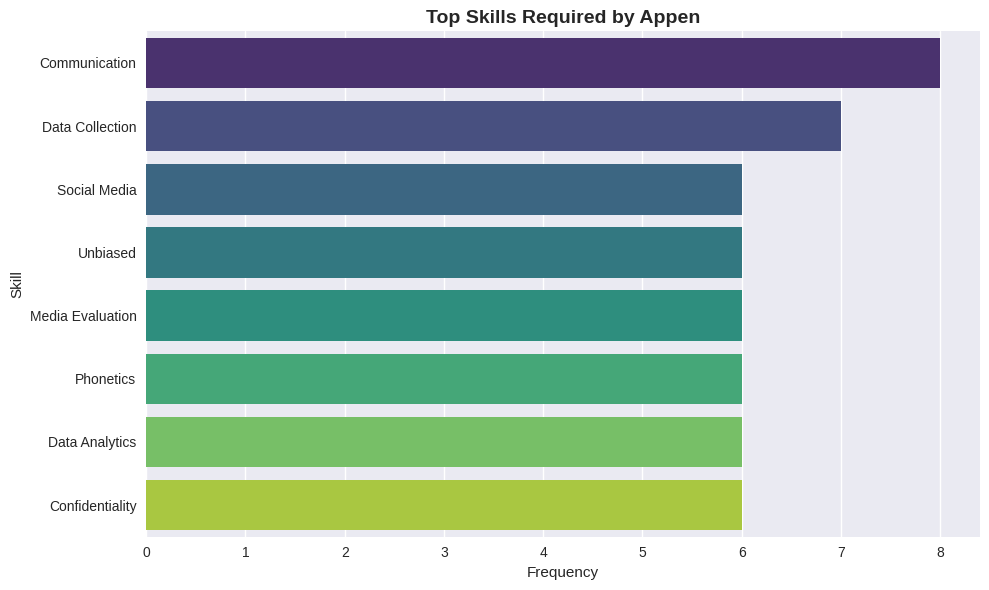


Top Skills for Appen:
1. Communication: 8 mentions
2. Data Collection: 7 mentions
3. Social Media: 6 mentions
4. Unbiased: 6 mentions
5. Media Evaluation: 6 mentions


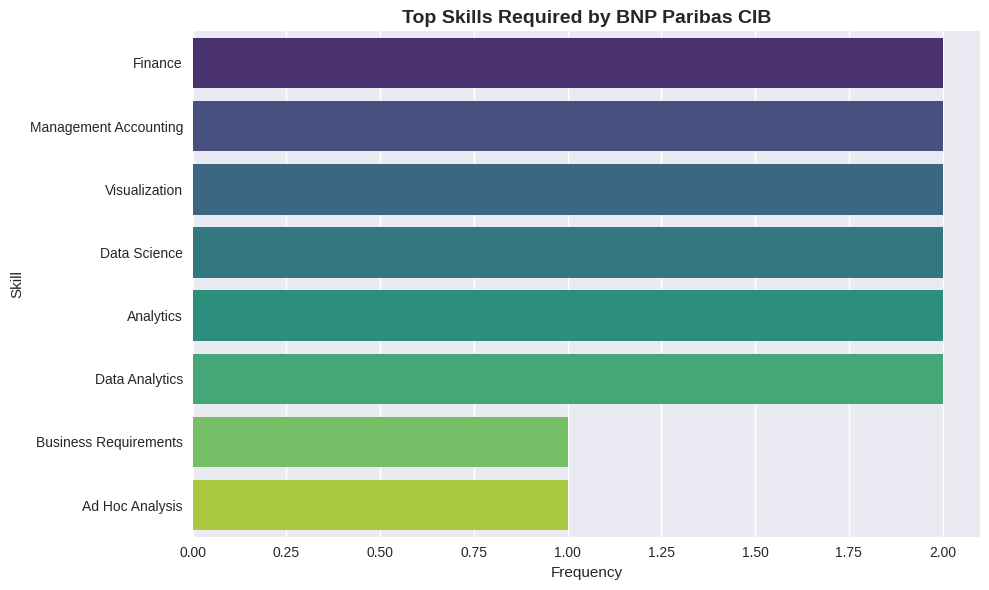


Top Skills for BNP Paribas CIB:
1. Finance: 2 mentions
2. Management Accounting: 2 mentions
3. Visualization: 2 mentions
4. Data Science: 2 mentions
5. Analytics: 2 mentions


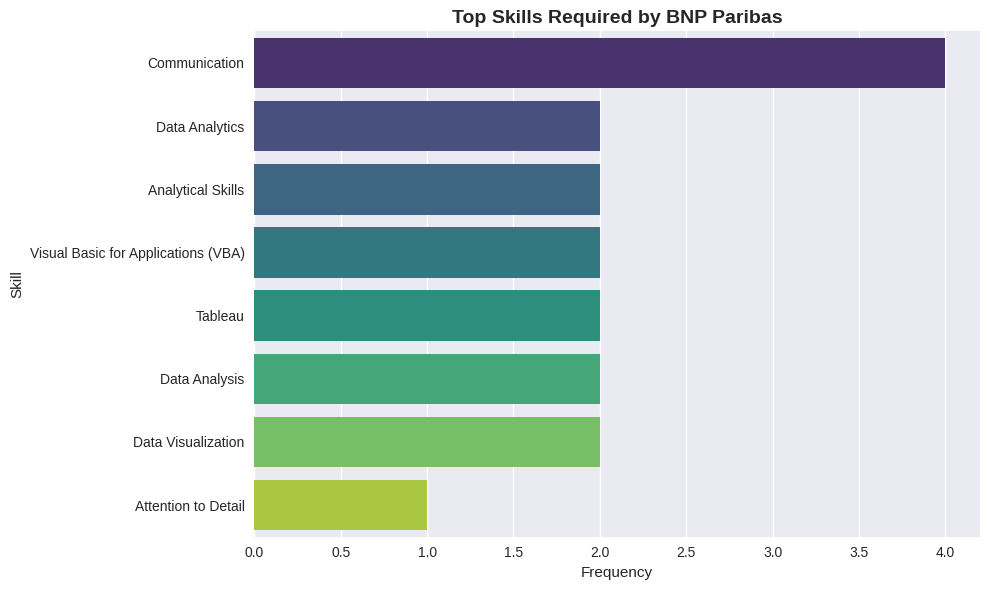


Top Skills for BNP Paribas:
1. Communication: 4 mentions
2. Data Analytics: 2 mentions
3. Analytical Skills: 2 mentions
4. Visual Basic for Applications (VBA): 2 mentions
5. Tableau: 2 mentions


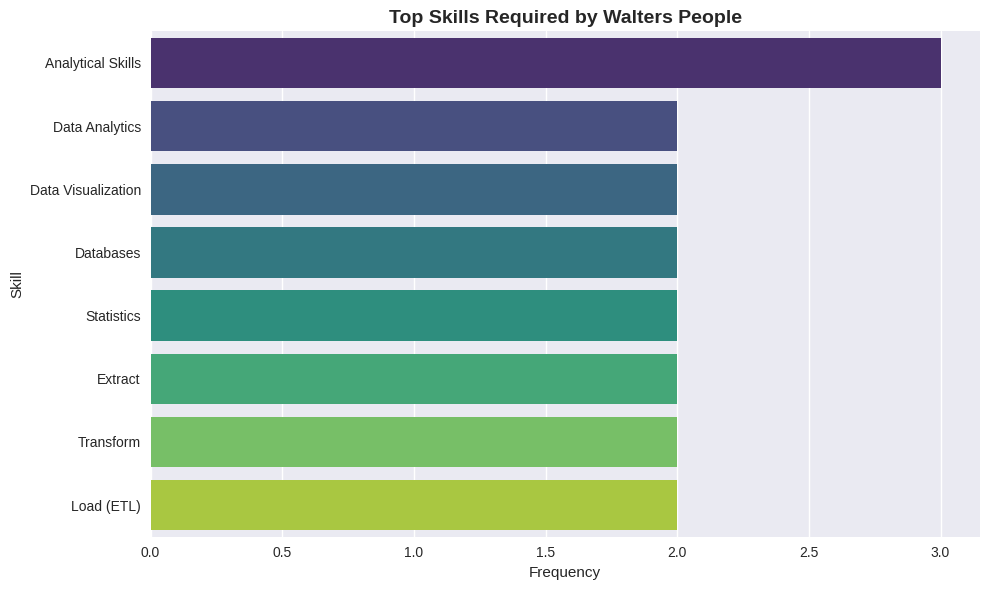


Top Skills for Walters People:
1. Analytical Skills: 3 mentions
2. Data Analytics: 2 mentions
3. Data Visualization: 2 mentions
4. Databases: 2 mentions
5. Statistics: 2 mentions


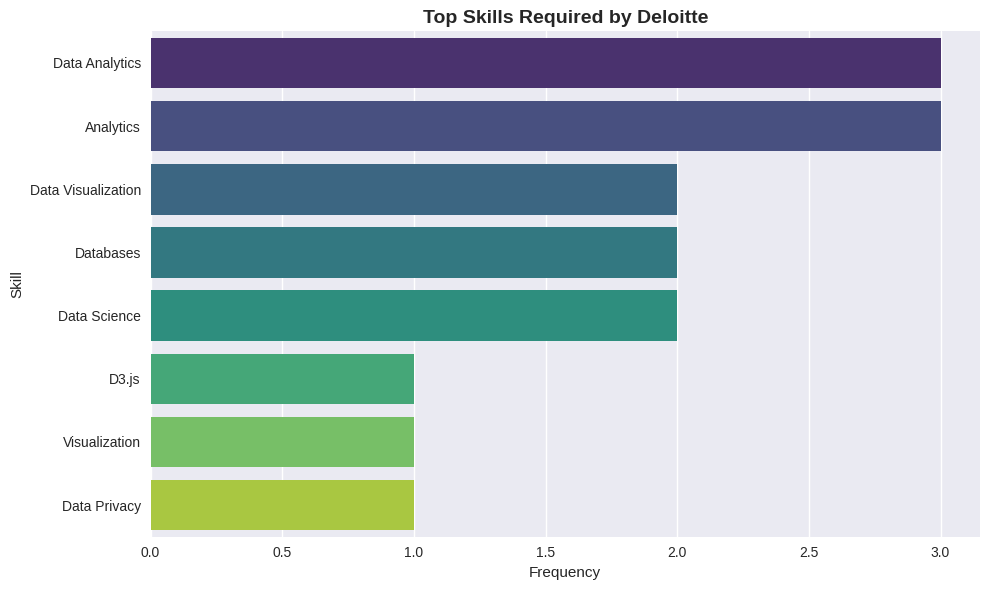


Top Skills for Deloitte:
1. Data Analytics: 3 mentions
2. Analytics: 3 mentions
3. Data Visualization: 2 mentions
4. Databases: 2 mentions
5. Data Science: 2 mentions


In [30]:
top_companies = df['company'].value_counts().head(5).index

for company in top_companies:
    company_skills = df[df['company']==company]['linkedin_skills'].dropna()
    if len(company_skills) > 0:
        all_sk = [skill.strip() for skills in company_skills for skill in skills.split(",")]
        skill_counts = pd.Series(all_sk).value_counts().head(8)

        plt.figure(figsize=(10,6))
        sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='viridis')
        plt.title(f'Top Skills Required by {company}', fontsize=14, fontweight='bold')
        plt.xlabel('Frequency')
        plt.ylabel('Skill')
        plt.tight_layout()
        plt.show()

        print(f"\nTop Skills for {company}:")
        for i, (skill, count) in enumerate(skill_counts.head(5).items(), 1):
            print(f"{i}. {skill}: {count} mentions")


## SUMMARY STATISTICS

In [31]:
print("\n" + "="*50)
print("EXECUTIVE SUMMARY")
print("="*50)

print(f"📊 Total Jobs Analyzed: {len(df):,}")
print(f"🌍 Countries Covered: {df['country'].nunique()}")
print(f"🏙️ Cities Represented: {df['city'].nunique()}")
print(f"🏢 Companies Hiring: {df['company'].nunique()}")
print(f"💼 Unique Job Titles: {df['job_title'].nunique()}")
print(f"🎯 Sectors Represented: {df['sector'].nunique()}")

print(f"\n📈 Top Country: {df['country'].value_counts().index[0]} ({df['country'].value_counts().iloc[0]} jobs)")
print(f"🏆 Most Hiring Company: {df['company'].value_counts().index[0]} ({df['company'].value_counts().iloc[0]} positions)")
print(f"💻 Most Demanded Job: {df['job_title'].value_counts().index[0]} ({df['job_title'].value_counts().iloc[0]} listings)")

# Top skills summary
top_3_skills = pd.Series(all_skills).value_counts().head(3)
print(f"\n🔥 Top 3 Skills:")
for i, (skill, count) in enumerate(top_3_skills.items(), 1):
    print(f"   {i}. {skill}: {count} mentions")

print(f"\n🏠 Remote Work: {(df['mode'].value_counts().get('Remote', 0) / len(df) * 100):.1f}% of positions")
print(f"🏢 On-site Work: {(df['mode'].value_counts().get('On-site', 0) / len(df) * 100):.1f}% of positions")




EXECUTIVE SUMMARY
📊 Total Jobs Analyzed: 265
🌍 Countries Covered: 25
🏙️ Cities Represented: 133
🏢 Companies Hiring: 227
💼 Unique Job Titles: 34
🎯 Sectors Represented: 53

📈 Top Country: France (49 jobs)
🏆 Most Hiring Company: Appen (9 positions)
💻 Most Demanded Job: Data Analyst (113 listings)

🔥 Top 3 Skills:
   1. Data Analytics: 121 mentions
   2. Analytical Skills: 106 mentions
   3. Data Visualization: 84 mentions

🏠 Remote Work: 6.8% of positions
🏢 On-site Work: 60.4% of positions
